<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
def sum_prod(X, V):
    '''
    X - список матриц размером (n, n)
    V - список векторов размером (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(X[0] @ V[0])
    for mat, vec in zip(X, V):
        result += mat @ vec
    return result

# Тесты для задачи 1
def test_sum_prod():
    # Тест 1
    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    assert np.array_equal(sum_prod(X1, V1), np.array([[5], [11]]))

    # Тест 2
    X2 = [np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])]
    V2 = [np.array([[1], [1]]), np.array([[1], [1]])]
    assert np.array_equal(sum_prod(X2, V2), np.array([[3], [3]]))

    print("Все тесты для sum_prod прошли успешно!")

test_sum_prod()

Все тесты для sum_prod прошли успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

# Тесты для задачи 2
def test_binarize():
    # Тест 1
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    assert np.array_equal(binarize(M1), np.array([[0, 1], [0, 1]]))

    # Тест 2 с другим порогом
    M2 = np.array([[0.1, 0.6], [0.4, 0.9]])
    assert np.array_equal(binarize(M2, 0.7), np.array([[0, 0], [0, 1]]))

    print("Все тесты для binarize прошли успешно!")

test_binarize()

Все тесты для binarize прошли успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

# Тесты для задачи 3
def test_unique():
    # Тест 1
    mat = np.array([[1, 2, 1], [4, 4, 4], [1, 2, 3]])

    # Проверка строк
    row_uniques = unique_rows(mat)
    assert len(row_uniques) == 3
    assert np.array_equal(row_uniques[0], [1, 2])
    assert np.array_equal(row_uniques[1], [4])
    assert np.array_equal(row_uniques[2], [1, 2, 3])

    # Проверка столбцов
    col_uniques = unique_columns(mat)
    assert len(col_uniques) == 3
    assert np.array_equal(col_uniques[0], [1, 4])
    assert np.array_equal(col_uniques[1], [2, 4])
    assert np.array_equal(col_uniques[2], [1, 3, 4])

    print("Все тесты для unique_rows и unique_columns прошли успешно!")

test_unique()

Все тесты для unique_rows и unique_columns прошли успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

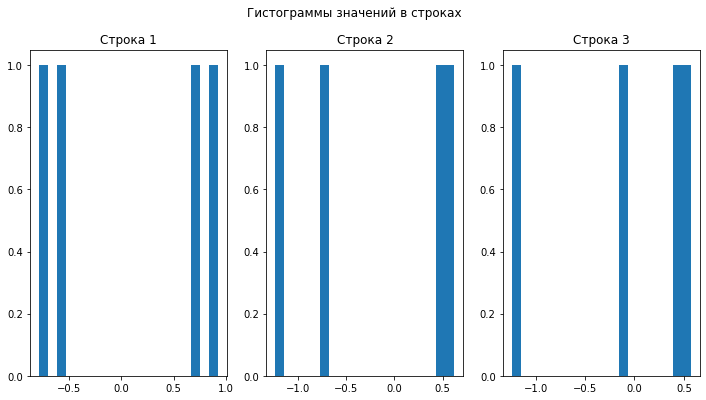

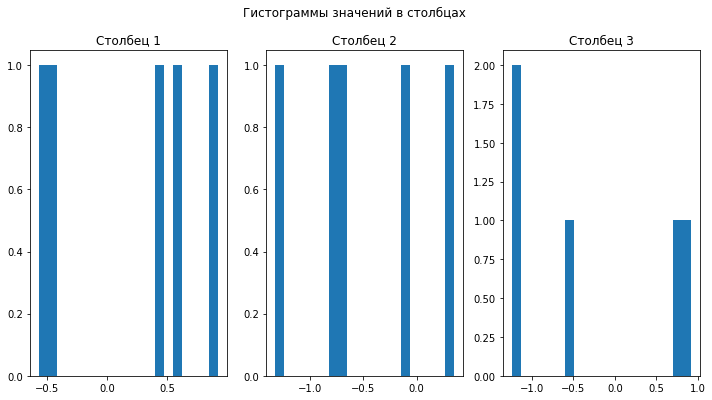

Средние по строкам: [ 0.07734207 -0.21215903 -0.08426717 -0.97032716  0.71091177]
Дисперсии по строкам: [0.58325206 0.5999451  0.51974454 0.17592558 0.85500347]
Средние по столбцам: [ 0.17673367 -0.51450506 -0.27106992  0.2260417 ]
Дисперсии по столбцам: [0.35690202 0.3320469  0.87671087 1.40493246]


In [7]:
def normal_matrix_stats(m, n):
    # Создаем матрицу с нормальным распределением
    mat = np.random.normal(loc=0, scale=1, size=(m, n))

    # Вычисляем статистики для строк
    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)

    # Вычисляем статистики для столбцов
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    # Строим гистограммы для строк
    plt.figure(figsize=(12, 6))
    for i in range(min(3, m)):  # Покажем только первые 3 строки для примера
        plt.subplot(1, 3, i+1)
        plt.hist(mat[i, :], bins=20)
        plt.title(f'Строка {i+1}')
    plt.suptitle('Гистограммы значений в строках')
    plt.show()

    # Строим гистограммы для столбцов
    plt.figure(figsize=(12, 6))
    for j in range(min(3, n)):  # Покажем только первые 3 столбца для примера
        plt.subplot(1, 3, j+1)
        plt.hist(mat[:, j], bins=20)
        plt.title(f'Столбец {j+1}')
    plt.suptitle('Гистограммы значений в столбцах')
    plt.show()

    return {
        'matrix': mat,
        'row_means': row_means,
        'row_vars': row_vars,
        'col_means': col_means,
        'col_vars': col_vars
    }

# Пример использования
stats = normal_matrix_stats(5, 4)
print("Средние по строкам:", stats['row_means'])
print("Дисперсии по строкам:", stats['row_vars'])
print("Средние по столбцам:", stats['col_means'])
print("Дисперсии по столбцам:", stats['col_vars'])

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
def chess(m, n, a, b):
    mat = np.empty((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if (i + j) % 2 == 0 else b
    return mat

# Тесты для задачи 5
def test_chess():
    # Тест 1
    expected1 = np.array([[1, 2], [2, 1]])
    assert np.array_equal(chess(2, 2, 1, 2), expected1)

    # Тест 2
    expected2 = np.array([[0, 5, 0], [5, 0, 5]])
    assert np.array_equal(chess(2, 3, 0, 5), expected2)

    print("Все тесты для chess прошли успешно!")

test_chess()

Все тесты для chess прошли успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

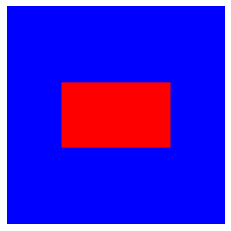

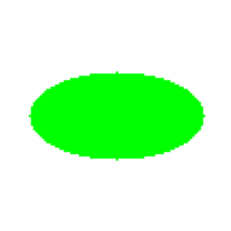

Функции отрисовки работают (визуальная проверка)


In [9]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоном
    image = np.zeros((m, n, 3))
    image[:, :] = background_color

    # Вычисляем границы прямоугольника
    x_start = (n - a) // 2
    y_start = (m - b) // 2
    x_end = x_start + a
    y_end = y_start + b

    # Рисуем прямоугольник
    image[y_start:y_end, x_start:x_end] = rectangle_color

    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с фоном
    image = np.zeros((m, n, 3))
    image[:, :] = background_color

    # Центр изображения
    x0, y0 = n // 2, m // 2

    # Создаем сетку координат
    x = np.arange(n)
    y = np.arange(m)
    xx, yy = np.meshgrid(x, y)

    # Уравнение эллипса
    ellipse = ((xx - x0)**2 / a**2 + (yy - y0)**2 / b**2) <= 1

    # Рисуем эллипс
    image[ellipse] = ellipse_color

    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Тесты для задачи 6
def test_draw():
    # Проверяем, что функции выполняются без ошибок
    draw_rectangle(50, 30, 100, 100, [1, 0, 0], [0, 0, 1])
    draw_ellipse(40, 20, 100, 100, [0, 1, 0], [1, 1, 1])
    print("Функции отрисовки работают (визуальная проверка)")

test_draw()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
def time_series_analysis(series, window_size):
    # Основные статистики
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)

    # Локальные экстремумы
    local_max = []
    local_min = []

    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_max.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_min.append(i)

    # Скользящее среднее
    moving_avg = np.convolve(series, np.ones(window_size)/window_size, mode='valid')

    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_max': local_max,
        'local_min': local_min,
        'moving_avg': moving_avg
    }

# Пример использования
series = np.array([1, 3, 7, 1, 2, 6, 0, 1])
result = time_series_analysis(series, 3)
print("Среднее:", result['mean'])
print("Дисперсия:", result['variance'])
print("СКО:", result['std'])
print("Локальные максимумы:", result['local_max'])
print("Локальные минимумы:", result['local_min'])
print("Скользящее среднее:", result['moving_avg'])

Среднее: 2.625
Дисперсия: 5.734375
СКО: 2.394655507583502
Локальные максимумы: [2, 5]
Локальные минимумы: [3, 6]
Скользящее среднее: [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
import numpy as np

def one_hot_encoding(labels):
    classes = np.unique(labels)
    num_classes = len(classes)
    encoding = np.zeros((len(labels), num_classes))

    # Создаем словарь для соответствия класса его индексу
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}

    for i, label in enumerate(labels):
        encoding[i, class_to_index[label]] = 1

    return encoding

# Исправленные тесты для задачи 8
def test_one_hot():
    # Тест 1
    labels1 = [0, 2, 3, 0]
    # Ожидаемый результат теперь соответствует порядку уникальных классов [0, 2, 3]
    expected1 = np.array([
        [1, 0, 0],  # класс 0
        [0, 1, 0],  # класс 2
        [0, 0, 1],  # класс 3
        [1, 0, 0]   # класс 0
    ])
    result1 = one_hot_encoding(labels1)
    assert np.array_equal(result1, expected1), f"Ошибка в тесте 1:\nОжидалось:\n{expected1}\nПолучено:\n{result1}"

    # Тест 2
    labels2 = [1, 1, 0]
    # Ожидаемый результат для классов [0, 1]
    expected2 = np.array([
        [0, 1],  # класс 1
        [0, 1],  # класс 1
        [1, 0]   # класс 0
    ])
    result2 = one_hot_encoding(labels2)
    assert np.array_equal(result2, expected2), f"Ошибка в тесте 2:\nОжидалось:\n{expected2}\nПолучено:\n{result2}"

    print("Все тесты для one_hot_encoding прошли успешно!")

test_one_hot()

Все тесты для one_hot_encoding прошли успешно!
